In [1020]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

In [1021]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
train_df = pd.read_csv(
    Path('../Loan_project/archive/credit_train.csv')   
)

# Review the DataFrame
train_df.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [1022]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
test_df = pd.read_csv(
    Path('../Loan_project/archive/credit_test.csv')   
)

# Review the DataFrame
test_df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [1023]:
# Merge the two dataframes
full_loan_df = pd.merge(train_df, test_df, how = 'outer')
full_loan_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
2,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
3,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
4,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0


In [1024]:
# Drop null values
full_loan_df.dropna(inplace=True)
full_loan_df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
3,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
8,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
10,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
12,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
14,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,Fully Paid,179454.0,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0
99993,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99995,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [1025]:
# Drop outlier credit scores
full_loan_df.drop(full_loan_df[full_loan_df["Credit Score"] > 850].index, inplace=True)

In [1026]:
# Show the min, max, etc. for each of the columns
full_loan_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,3.446800e+04,34468.000000,3.446800e+04,34468.000000,34468.000000,34468.000000,34468.000000,34468.000000,3.446800e+04,3.446800e+04,34468.000000,34468.000000
mean,1.453814e+07,713.667373,1.468813e+06,19236.083886,19.085540,34.875305,11.474817,0.186057,2.637262e+05,6.709624e+05,0.115353,0.037890
std,3.486578e+07,28.258809,9.277447e+05,12106.051560,6.647117,21.883338,4.987224,0.528686,3.196570e+05,5.859936e+06,0.360501,0.297108
min,2.145000e+04,585.000000,1.112450e+05,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.907565e+05,701.000000,9.333370e+05,11086.120000,14.500000,16.000000,8.000000,0.000000,1.004862e+05,2.470050e+05,0.000000,0.000000
50%,3.253800e+05,720.000000,1.263044e+06,17091.070000,17.700000,32.000000,11.000000,0.000000,1.864850e+05,4.220370e+05,0.000000,0.000000
75%,5.484765e+05,735.000000,1.747306e+06,24748.117500,22.400000,51.000000,14.000000,0.000000,3.284198e+05,7.039395e+05,0.000000,0.000000
max,1.000000e+08,751.000000,2.809530e+07,229057.920000,70.500000,176.000000,48.000000,15.000000,7.350321e+06,7.982554e+08,7.000000,15.000000


In [1027]:
# Show the value counts for Loan Status
full_loan_df["Loan Status"].value_counts()

Loan Status
Fully Paid     28972
Charged Off     5496
Name: count, dtype: int64

In [1028]:
# Recode the Loan Status variable
full_loan_df['Loan Status'] = full_loan_df['Loan Status'].replace(['Fully Paid', 'Charged Off'], [0,1])

In [1029]:
# Display the DataFrame to make sure the variables were recoded 
full_loan_df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
3,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
8,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,0,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
10,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,0,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
12,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,0,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
14,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,0,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,0,179454.0,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0
99993,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,0,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99995,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,0,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,0,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [1030]:
# Export the df to a csv file
full_loan_df.to_csv('full_loan_dataset.csv')

In [1031]:
# Drop ID columnns
full_loan_df.drop("Loan ID", axis = 1, inplace = True)
full_loan_df.drop("Customer ID", axis = 1, inplace = True)
full_loan_df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
3,0,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
8,0,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
10,0,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
12,0,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
14,0,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


In [1032]:
# Convert categorical data to numeric with `pd.get_dummies`
full_loan_recode_df = pd.get_dummies(full_loan_df)
pd.set_option('display.max_columns', None)
full_loan_recode_df

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
3,0,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,0,217646.0,730.0,1184194.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
10,0,548746.0,678.0,2559110.0,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
12,0,99999999.0,728.0,714628.0,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
14,0,99999999.0,740.0,776188.0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,0,179454.0,708.0,1356068.0,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
99993,0,99999999.0,742.0,1190046.0,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
99995,0,210584.0,719.0,783389.0,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
99996,0,99999999.0,732.0,1289416.0,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


# Random Forest

In [1033]:
# Define features set
X = full_loan_recode_df.copy()
X.drop("Loan Status", axis=1, inplace=True)
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
3,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,217646.0,730.0,1184194.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
10,548746.0,678.0,2559110.0,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
12,99999999.0,728.0,714628.0,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
14,99999999.0,740.0,776188.0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [1034]:
# Define target vector
y = full_loan_recode_df["Loan Status"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [1035]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [1036]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [1037]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [1038]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [1039]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [1040]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train, y_train.ravel())

In [1041]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [1042]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [1043]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,7222,7
Actual 1,1376,12


Accuracy Score : 0.8395033074155739
Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7229
           1       0.63      0.01      0.02      1388

    accuracy                           0.84      8617
   macro avg       0.74      0.50      0.46      8617
weighted avg       0.81      0.84      0.77      8617



In [1044]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.12002576564297994, 'Current Loan Amount'),
 (0.10083233921719331, 'Annual Income'),
 (0.09533412077978105, 'Monthly Debt'),
 (0.09248753732657634, 'Maximum Open Credit'),
 (0.09208273811707002, 'Current Credit Balance'),
 (0.09092201495901993, 'Credit Score'),
 (0.09060063448872557, 'Years of Credit History'),
 (0.08315615417435834, 'Months since last delinquent'),
 (0.06555833938865463, 'Number of Open Accounts'),
 (0.011934134046475923, 'Number of Credit Problems')]

# Regression with 9 predictors

In [1045]:
loan_regression_df = full_loan_recode_df[['Loan Status', 'Current Loan Amount', 'Monthly Debt', 'Maximum Open Credit', 'Current Credit Balance', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts','Credit Score', 'Annual Income']]
loan_regression_df

,Loan Status,Current Loan Amount,Monthly Debt,Maximum Open Credit,Current Credit Balance,Years of Credit History,Months since last delinquent,Number of Open Accounts,Credit Score,Annual Income
3,0,99999999.0,29200.53,750090.0,297996.0,14.9,29.0,18.0,741.0,2231892.0
8,0,217646.0,10855.08,272052.0,122170.0,19.6,10.0,13.0,730.0,1184194.0
10,0,548746.0,18660.28,555038.0,437171.0,22.6,33.0,4.0,678.0,2559110.0
12,0,99999999.0,11851.06,289784.0,203965.0,16.0,76.0,16.0,728.0,714628.0
14,0,99999999.0,11578.22,220220.0,134083.0,8.5,25.0,6.0,740.0,776188.0
...,...,...,...,...,...,...,...,...,...,...
99989,0,179454.0,22318.54,1705616.0,387410.0,22.7,21.0,25.0,708.0,1356068.0
99993,0,99999999.0,11969.81,134442.0,37392.0,20.1,16.0,9.0,742.0,1190046.0
99995,0,210584.0,3727.61,259160.0,456.0,17.4,18.0,6.0,719.0,783389.0
99996,0,99999999.0,13109.05,509234.0,153045.0,9.4,21.0,22.0,732.0,1289416.0


In [1046]:
loan_regression_df = loan_regression_df[loan_regression_df['Current Loan Amount'] != 99999999.0].copy()

In [1047]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = loan_regression_df['Loan Status']

# Separate the X variable, the features
X = loan_regression_df.drop(columns='Loan Status')

In [1048]:
# Review the y variable Series
y[:5]

8     0
10    0
16    0
19    0
20    0
Name: Loan Status, dtype: int64

In [1049]:
# Review the X variable DataFrame
X[:5]

,Current Loan Amount,Monthly Debt,Maximum Open Credit,Current Credit Balance,Years of Credit History,Months since last delinquent,Number of Open Accounts,Credit Score,Annual Income
8,217646.0,10855.08,272052.0,122170.0,19.6,10.0,13.0,730.0,1184194.0
10,548746.0,18660.28,555038.0,437171.0,22.6,33.0,4.0,678.0,2559110.0
16,234124.0,14211.24,107052.0,28291.0,24.7,46.0,10.0,727.0,693234.0
19,666204.0,17612.24,2004618.0,813694.0,22.0,34.0,15.0,723.0,1821967.0
20,666204.0,17612.24,2004618.0,813694.0,22.0,34.0,15.0,723.0,1821967.0


In [1050]:
# Check the balance of our target values
y.value_counts()

Loan Status
0    24054
1     5496
Name: count, dtype: int64

In [1051]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [1052]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [1053]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)

In [1054]:
# Print the balanced_accuracy score of the models
accuracy_score(y_test, predictions)

0.8156469951272334

In [1055]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[6026,    0],
       [1362,    0]])

In [1056]:
# Print the classification report for the model
testing_report = classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      6026
           1       0.00      0.00      0.00      1362

    accuracy                           0.82      7388
   macro avg       0.41      0.50      0.45      7388
weighted avg       0.67      0.82      0.73      7388



/Users/brittanywright/opt/anaconda3/envs/PythonData3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brittanywright/opt/anaconda3/envs/PythonData3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brittanywright/opt/anaconda3/envs/PythonData3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

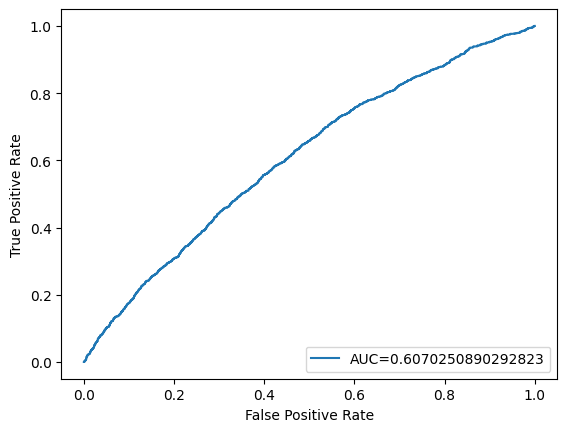

In [1057]:
# Define the metrics
# Code adapted from AUC code via statology https://www.statology.org/plot-roc-curve-python/
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Try Oversampling to Correct for the imbalance in Paid Off and Charged Loans

In [1058]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
oversample = RandomOverSampler(sampling_strategy='minority', random_state=1)

# Create the StandardScaler instance
#scaler = StandardScaler()

# Fit the Standard Scaler with the training data
#X_scaler = scaler.fit_transform(X_train)

# Fit the original training data to the random_oversampler model
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [1059]:
# Count the distinct values of the resampled labels data
y_over.value_counts()

Loan Status
0    18028
1    18028
Name: count, dtype: int64

In [1060]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier2 = LogisticRegression(solver='lbfgs', random_state=1)
classifier2

# Fit the model using  the resampled training data
classifier2.fit(X_over, y_over)


# Make a prediction using the testing data
predictions2 = classifier2.predict(X_test)

In [1061]:
# Print the balanced_accuracy score of the model 
accuracy_score(y_test, predictions2)

0.5522468868435301

In [1062]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions2)

array([[3237, 2789],
       [ 519,  843]])

In [1063]:
# Print the classification report for the model
testing_report2 = classification_report(y_test, predictions2)
print(testing_report2)

              precision    recall  f1-score   support

           0       0.86      0.54      0.66      6026
           1       0.23      0.62      0.34      1362

    accuracy                           0.55      7388
   macro avg       0.55      0.58      0.50      7388
weighted avg       0.75      0.55      0.60      7388



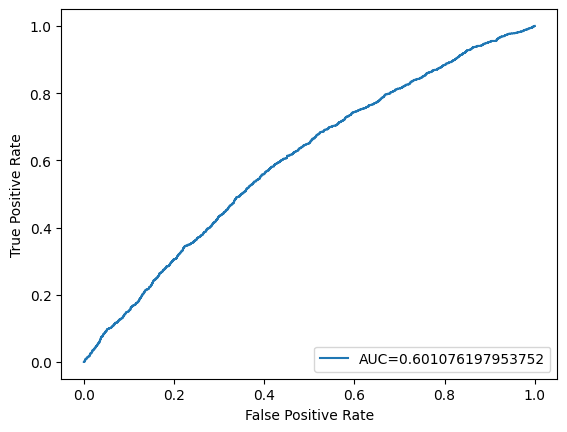

In [1064]:
# Define the Metrics
# Code from statology https://www.statology.org/plot-roc-curve-python/
y_pred_proba = classifier2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Plot the  ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [1065]:
# Create the random forest classifier instance
rf_model2 = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model and use .ravel()on the "y_train" data. 
rf_model2 = rf_model2.fit(X_over, y_over.ravel())

# Making predictions using the testing data
predictions_rf = rf_model2.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions_rf)
cm_df2 = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = balanced_accuracy_score(y_test, predictions_rf)

# Displaying results
print("Confusion Matrix")
display(cm_df2)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions_rf))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5914,112
Actual 1,1277,85


Accuracy Score : 0.5219110482086192
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6026
           1       0.43      0.06      0.11      1362

    accuracy                           0.81      7388
   macro avg       0.63      0.52      0.50      7388
weighted avg       0.75      0.81      0.75      7388



# Try Undersampling to Correct for the Imbalance in Paid Off and Charged Loans

In [1066]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=1)

# Fit the original training data to the random_oversampler model
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [1067]:
# Count the distinct values of the resampled labels data
y_under.value_counts()

Loan Status
0    4134
1    4134
Name: count, dtype: int64

In [1068]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier3 = LogisticRegression(solver='lbfgs', random_state=1)
classifier3

# Fit the model using  the resampled training data
classifier3.fit(X_under, y_under)


# Make a prediction using the testing data
predictions3 = classifier3.predict(X_test)

In [1069]:
# Print the balanced_accuracy score of the model 
accuracy_score(y_test, predictions3)

0.5538711423930699

In [1070]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions3)

array([[3252, 2774],
       [ 522,  840]])

In [1071]:
# Print the classification report for the model
testing_report3 = classification_report(y_test, predictions3)
print(testing_report3)

              precision    recall  f1-score   support

           0       0.86      0.54      0.66      6026
           1       0.23      0.62      0.34      1362

    accuracy                           0.55      7388
   macro avg       0.55      0.58      0.50      7388
weighted avg       0.75      0.55      0.60      7388



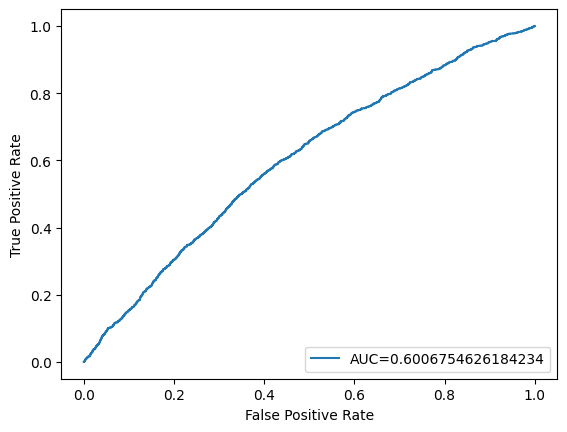

In [1072]:
# Define the metrics
# Code from statology https://www.statology.org/plot-roc-curve-python/
y_pred_proba = classifier3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Try Running the Regression with 5 Predictors with the Most Explained Variance

In [1073]:
loan_regression2_df = full_loan_recode_df[['Loan Status', 'Current Loan Amount', 'Monthly Debt', 'Maximum Open Credit', 'Current Credit Balance', 'Annual Income']]
loan_regression2_df

,Loan Status,Current Loan Amount,Monthly Debt,Maximum Open Credit,Current Credit Balance,Annual Income
3,0,99999999.0,29200.53,750090.0,297996.0,2231892.0
8,0,217646.0,10855.08,272052.0,122170.0,1184194.0
10,0,548746.0,18660.28,555038.0,437171.0,2559110.0
12,0,99999999.0,11851.06,289784.0,203965.0,714628.0
14,0,99999999.0,11578.22,220220.0,134083.0,776188.0
...,...,...,...,...,...,...
99989,0,179454.0,22318.54,1705616.0,387410.0,1356068.0
99993,0,99999999.0,11969.81,134442.0,37392.0,1190046.0
99995,0,210584.0,3727.61,259160.0,456.0,783389.0
99996,0,99999999.0,13109.05,509234.0,153045.0,1289416.0


In [1074]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = loan_regression2_df['Loan Status']

# Separate the X variable, the features
X = loan_regression2_df.drop(columns='Loan Status')

In [1075]:
# Review the y variable Series
y[:5]

3     0
8     0
10    0
12    0
14    0
Name: Loan Status, dtype: int64

In [1076]:
# Review the X variable DataFrame
X[:5]

,Current Loan Amount,Monthly Debt,Maximum Open Credit,Current Credit Balance,Annual Income
3,99999999.0,29200.53,750090.0,297996.0,2231892.0
8,217646.0,10855.08,272052.0,122170.0,1184194.0
10,548746.0,18660.28,555038.0,437171.0,2559110.0
12,99999999.0,11851.06,289784.0,203965.0,714628.0
14,99999999.0,11578.22,220220.0,134083.0,776188.0


In [1077]:
# Check the balance of our target values
y.value_counts()

Loan Status
0    28972
1     5496
Name: count, dtype: int64

In [1078]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [1079]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier4 = LogisticRegression(solver='lbfgs', random_state=1)
classifier4

# Fit the model using training data
classifier4.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [1080]:
# Make a prediction using the testing data
predictions4 = classifier4.predict(X_test)


In [1081]:
# Print the balanced_accuracy score of the models
accuracy_score(y_test, predictions4)

0.8379946617152141

In [1082]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions4)

array([[7221,    0],
       [1396,    0]])

In [1083]:
# Print the classification report for the model
testing_report4 = classification_report(y_test, predictions4)
print(testing_report4)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7221
           1       0.00      0.00      0.00      1396

    accuracy                           0.84      8617
   macro avg       0.42      0.50      0.46      8617
weighted avg       0.70      0.84      0.76      8617



/Users/brittanywright/opt/anaconda3/envs/PythonData3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brittanywright/opt/anaconda3/envs/PythonData3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brittanywright/opt/anaconda3/envs/PythonData3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

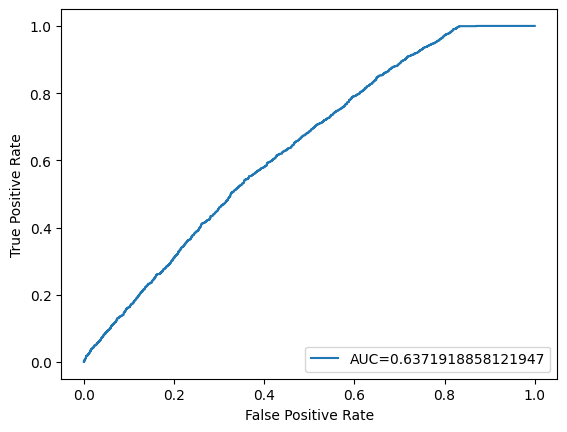

In [1084]:
# Define the metrics
# Code adapted from AUC code via statology https://www.statology.org/plot-roc-curve-python/
y_pred_proba = classifier4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
